In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 8]

# Dataset generation

Using data available at 2018-12-01 16:47

In [2]:
import pandas as pd

df_text = pd.read_csv('buff_text.csv')
df_acquired = pd.read_csv('player_acquired_buff.csv')
df_equipped = pd.read_csv('player_equipped_buff.csv')
df_player = pd.read_csv('player.csv')
df_template = pd.read_csv('player_template.csv')

# Data exploration and feature engineering

### Players

In [3]:
players = df_player.copy()
print(players.columns)
players.describe()

Index(['steam_id', 'level', 'cash', 'exp', 'pills', 'last_seen_name',
       'last_ip', 'last_active', 'clan_id', 'clan_pos', 'reputation',
       'bar_mode', 'bar_style', 'language_id', 'spawn_type', 'surv_char',
       'booster_active', 'booster_multiplier', 'booster_expiration',
       'has_special_slot', 'coop_template', 'vs_survivor_template',
       'see_own_items', 'aoe_auto_heal_min_survs', 'aoe_auto_revive_min_survs',
       'role_smoker', 'role_boomer', 'role_hunter', 'role_spitter',
       'role_jockey', 'role_charger', 'honor_points', 'skill',
       'show_versus_title', 'notificationFlags', 'clan_no_join_end',
       'experimentalFlags'],
      dtype='object')


,level,cash,exp,pills,clan_id,clan_pos,reputation,bar_mode,bar_style,language_id,...,role_boomer,role_hunter,role_spitter,role_jockey,role_charger,honor_points,skill,show_versus_title,notificationFlags,experimentalFlags
count,345675.000000,3.456750e+05,3.456750e+05,3.456750e+05,345675.000000,345675.000000,345675.000000,345675.000000,345675.000000,345675.000000,...,345675.000000,345675.000000,345675.000000,345675.000000,345675.000000,345675.000000,345675.000000,345675.000000,345675.000000,345675.000000
mean,8.688618,3.885355e+04,3.646903e+04,6.410603e+02,0.534004,0.006150,22.891901,1.999184,1.021242,0.000006,...,1.000613,1.000255,2.000634,4.000284,4.998542,0.028321,99.970278,0.000986,278.557026,0.000093
std,20.487210,4.453021e+06,1.355345e+06,2.405545e+05,10.087394,0.115017,113.637879,0.039443,0.806690,0.002405,...,0.035017,0.018317,0.034476,0.047012,0.062058,1.222801,1.443488,0.041337,23.413773,0.013817
min,1.000000,0.000000e+00,-6.600000e+03,0.000000e+00,0.000000,0.000000,-1000.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,1.000000,5.000000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,...,1.000000,1.000000,2.000000,4.000000,5.000000,0.000000,100.000000,0.000000,278.000000,0.000000
50%,2.000000,5.310000e+02,2.170000e+02,0.000000e+00,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,...,1.000000,1.000000,2.000000,4.000000,5.000000,0.000000,100.000000,0.000000,278.000000,0.000000
75%,7.000000,7.890000e+02,1.155000e+03,0.000000e+00,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,...,1.000000,1.000000,2.000000,4.000000,5.000000,0.000000,100.000000,0.000000,278.000000,0.000000
max,300.000000,1.476296e+09,2.035730e+08,9.999143e+07,395.000000,4.000000,1000.000000,3.000000,188.000000,1.000000,...,3.000000,3.000000,6.000000,7.000000,5.000000,219.000000,216.000000,3.000000,2007.000000,3.000000


In [4]:
# Leave only columns that are really necessary
players = players[['steam_id', 'last_active', 'level', 'cash', 'pills', 'clan_id', 'clan_pos', 'reputation', 'coop_template', 'vs_survivor_template']]

# We need to also make sure we are using a representation of the active population.

players['last_active'] = pd.to_datetime(df_player['last_active']) 
players = players.loc[players['last_active'] > '2018-08-01']
players = players.loc[players['level'] > 100]



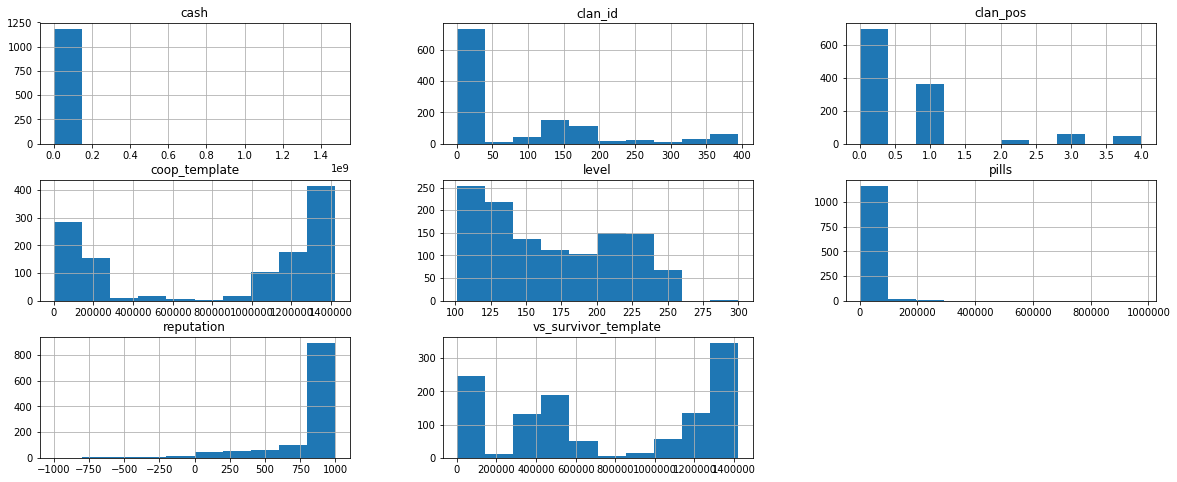

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
players.hist()
plt.show()

### Templates

In [6]:
mask = df_template['steam_id'].isin(list(players['steam_id']))
templates = df_template[mask]

### Acquired

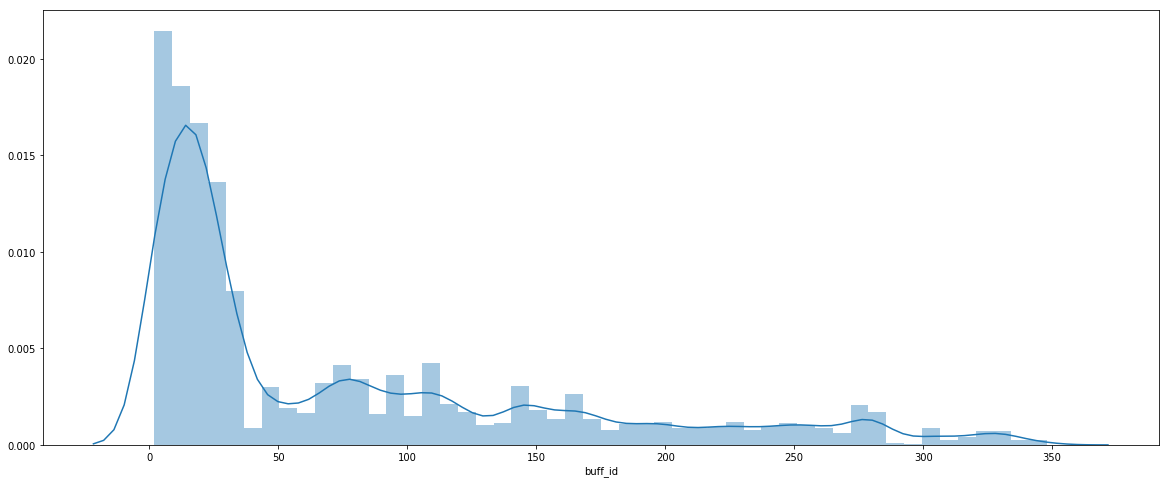

In [7]:
import seaborn as sns
sns.distplot(df_acquired['buff_id'])
plt.show()

### Equipped

In [8]:
mask = df_equipped['template_id'].isin(list(templates['template_id']))
equipped = df_equipped[mask]

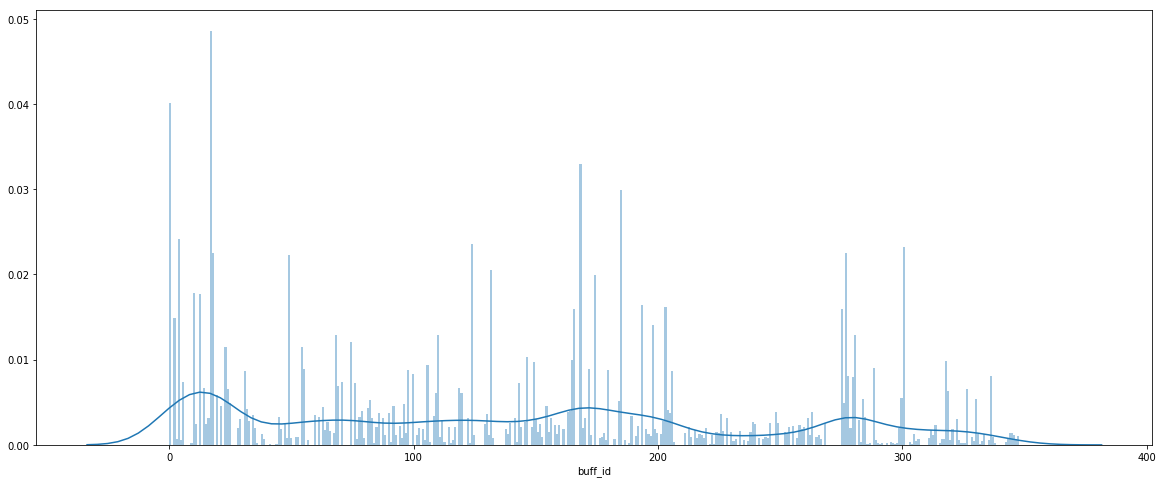

In [9]:
import seaborn as sns
sns.distplot(equipped['buff_id'], bins=400)
plt.show()

In [10]:
equipped_frequency = equipped['buff_id'].value_counts()

In [12]:
def get_buff_name(id):
    
    if (id == 0):
        return None
    return df_text.loc[(df_text['buff_id'] == id) & (df_text['language_id'] == 1)].name.values[0]


t = pd.DataFrame(equipped_frequency)
t.columns = ['Frequency']
t['Buff'] = list(map(lambda x: get_buff_name(x) , t.index.values))
print(t.to_string())

     Frequency                            Buff
17        2481                           Knife
0         2046                            None
168       1683                     Tank Slayer
185       1525                        Tenacity
4         1234                  Adrenaline Run
124       1201            |Q| Piercing Bullets
301       1185                 Mobility Master
18        1152                    Speedy Water
277       1151                     Unstoppable
49        1138                         Goggles
132       1049               |E| Knife Recycle
174       1016            General Tank Handler
10         911                         Vampire
13         902                  Shoving Expert
194        838                    Dummy Rounds
203        829                     |E| Berserk
166        816                         Avenger
275        813                        Observer
2          760                  Anger Ignition
198        721  |E| Advanced Morphine Injector
281        66